## Unhealth Home Featrues Identification, Map Visulization, and Predict Unhealth Features
* Import Data
* Data Preprocessing
* Feature Engineering
* Data Visulization
* Model Training and Evaluation
* Conclusion
* Recommendation

In [2]:
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install geopandas
!pip install osmnx
!pip install contextily
!pip install folium
!pip install plotly_express
!pip install geofeather
!pip install matplotlib==3.1.3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (10.3 MB/s)
Selecting previously unselected 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 151 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 28.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you

In [3]:

import os
import pandas as pd
import numpy as np

# Geo-related libraries
import geopandas as gpd
import osmnx as ox
import folium
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import contextily as ctx
import geofeather
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely import wkt
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
from shapely import wkt

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Timer
from tqdm import tqdm, tqdm_notebook


# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor


# Model support functions
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler 
from pprint import pprint
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Import Data

In [4]:
from google.colab import drive # improt data from google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/MyDrive/Data/'

/content/drive/MyDrive/Data


In [6]:
df = pd.read_csv("Home_n_Map.csv")
df.head(2)

,NO value,NO2 value,PM2p5 value,geometry,road_type,zone,tract_name,GEOID,state,county,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.3225938 37.80678062),tertiary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80614989),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8


In [7]:
df.info() # There are some missing values in some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO value        18286 non-null  float64
 1   NO2 value       18286 non-null  float64
 2   PM2p5 value     18286 non-null  float64
 3   geometry        18286 non-null  object 
 4   road_type       18286 non-null  object 
 5   zone            18238 non-null  object 
 6   tract_name      18286 non-null  object 
 7   GEOID           18286 non-null  int64  
 8   state           18286 non-null  int64  
 9   county          18286 non-null  int64  
 10  pop_den         18286 non-null  float64
 11  wind            18270 non-null  float64
 12  temp            18270 non-null  float64
 13  Longitude       18286 non-null  float64
 14  Latitude        18286 non-null  float64
 15  Respiratory_HI  18286 non-null  object 
 16  Pt_CANCR        18286 non-null  object 
dtypes: float64(8), int64(3), object

## Data Preprocessing
* Rename  features
* Drop irrelevant features
* Remove missing and duplicated data
* Identify outliers


In [8]:
# Rename columns
df.rename(columns = {'NO value':'NO','NO2 value': 'NO2','PM2p5 value':'PM2p5'}, inplace=True)
df.head(2)

,NO,NO2,PM2p5,geometry,road_type,zone,tract_name,GEOID,state,county,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.3225938 37.80678062),tertiary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80614989),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8


In [9]:
df.nunique() # 

NO                16015
NO2               18226
PM2p5             18281
geometry          18281
road_type             6
zone                  5
tract_name           73
GEOID                73
state                 1
county                1
pop_den              73
wind                 45
temp                 80
Longitude         18129
Latitude          18257
Respiratory_HI        3
Pt_CANCR              3
dtype: int64

In [10]:
# Drop meaningless features
df.drop(['state','county','GEOID','tract_name'], axis = 1,inplace = True)
df.head(2)

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.3225938 37.80678062),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80614989),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8


In [11]:
# Remove missing data since only a few rows include missing data
df.dropna(axis=0, subset=['zone', 'wind', 'temp'],inplace = True)
df.reset_index(inplace=True,drop=True)
df.isnull().sum()

NO                0
NO2               0
PM2p5             0
geometry          0
road_type         0
zone              0
pop_den           0
wind              0
temp              0
Longitude         0
Latitude          0
Respiratory_HI    0
Pt_CANCR          0
dtype: int64

In [12]:
# Confrim missing data are removed and index are reset
print(len(df))
df.iloc[[0,-1]]

18222


,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.3225938 37.80678062),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
18221,18.842105,16.122072,9.270166,POINT (-122.1390328 37.73246375),motorway,residential,486.040242,3.816667,15.041669,-122.139033,37.732464,low,< 0.4


In [13]:
# Drop duplicates
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
print(len(df))
df.iloc[[0,-1]]

18219


,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.3225938 37.80678062),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
18218,18.842105,16.122072,9.270166,POINT (-122.1390328 37.73246375),motorway,residential,486.040242,3.816667,15.041669,-122.139033,37.732464,low,< 0.4


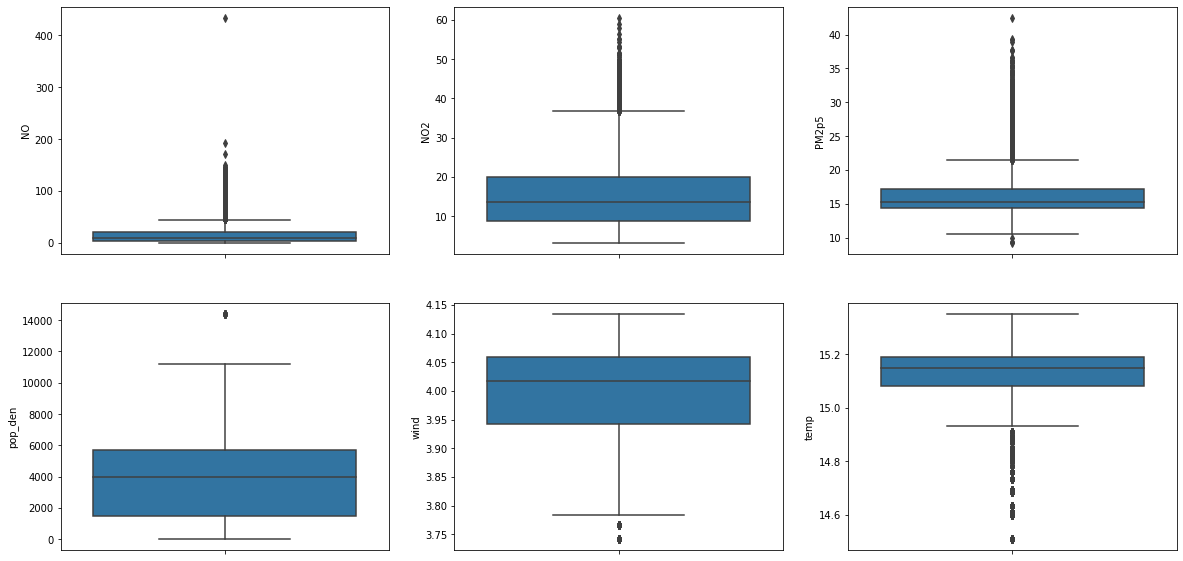

In [14]:
# Outliers are identified by boxplots 
_, axss = plt.subplots(2,3, figsize=[20,10])  # create a 2x3 matrix = 6 figures
sns.boxplot(y ='NO', data=df, ax=axss[0, 0])
sns.boxplot(y ='NO2', data=df, ax=axss[0, 1])
sns.boxplot(y ='PM2p5', data=df, ax=axss[0, 2])
sns.boxplot(y ='pop_den', data=df, ax=axss[1][0])
sns.boxplot(y ='wind', data=df, ax=axss[1][1])
sns.boxplot(y ='temp', data=df, ax=axss[1][2])

In [15]:
# Set outliers in NO as 200 based on documentation introduction 
df.loc[df['NO'] > 200, 'NO'] = 200

## Feature Engineering

### Convert dataframe to geodataframe and spatial join with oakland city data

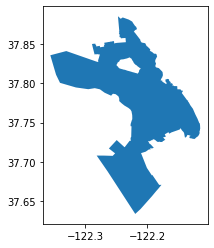

In [16]:
Oakland_poly = ox.geocode_to_gdf('Oakland California')
Oakland_poly.plot()

In [21]:
df.head(2)

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.3225938 37.80678062),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80614989),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8


In [24]:
gpd_1_degree = gpd.GeoDataFrame(df,  geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs={'init' :'epsg:4326'})
Oakland_poly.crs, gpd_1_degree.crs

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich, <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [27]:
gpd_1_degree.head(2)

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8


In [28]:
# spatial-join pollutant and health data in Oakland polygon grid (make sure all data represent Oakland city)
gpd_1_city = gpd.sjoin(gpd_1_degree, Oakland_poly, how="inner", op="intersects") 
gpd_1_city.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  


,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,...,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,...,-122.355881,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,...,-122.355881,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796


In [29]:
print("*** Cnts of Each Feature ***")
print(gpd_1_city.nunique()) # drop the columns that only have one value

*** Cnts of Each Feature ***
NO                15963
NO2               18162
PM2p5             18217
geometry          18217
road_type             6
zone                  5
pop_den              70
wind                 45
temp                 80
Longitude         18067
Latitude          18194
Respiratory_HI        3
Pt_CANCR              3
index_right           1
bbox_north            1
bbox_south            1
bbox_east             1
bbox_west             1
place_id              1
osm_type              1
osm_id                1
lat                   1
lon                   1
display_name          1
class                 1
type                  1
importance            1
dtype: int64


In [30]:
gpd_1_city = gpd_1_city.drop(['index_right', 'bbox_east', 'bbox_north', 'bbox_south', 'bbox_west'], axis=1)

### Oakland city structures (roads)

#### roads Information

In [31]:
# obtain all of streets data
oak_streets = ox.graph_from_place('Oakland, California', network_type = 'drive')
nodes, oakland_rds = ox.graph_to_gdfs(oak_streets)

In [32]:
nodes.head(1)

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
30362888,37.825844,-122.303049,8A,motorway_junction,3,POINT (-122.30305 37.82584)


In [33]:
oakland_rds.head(1)

,,,osmid,oneway,lanes,ref,highway,maxspeed,length,geometry,bridge,name,tunnel,access,junction
u,v,key,,,,,,,,,,,,,
30362888,1943438853,0,710721717,True,7,I 80,motorway,50 mph,135.576,"LINESTRING (-122.30305 37.82584, -122.30455 37...",NaN,NaN,NaN,NaN,NaN


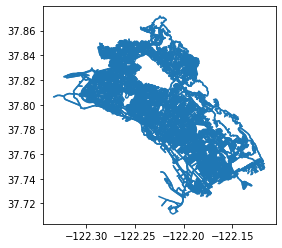

In [34]:
oakland_rds.plot()

In [35]:
oakland_rds['highway'] = oakland_rds['highway'].str.replace('_link', '')
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'trunk', 'secondary', oakland_rds['highway'])
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'living_street', 'residential', oakland_rds['highway'])
print(oakland_rds['highway'].value_counts())

residential     15068
secondary        3155
tertiary         2567
primary           788
motorway          523
unclassified      226
Name: highway, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


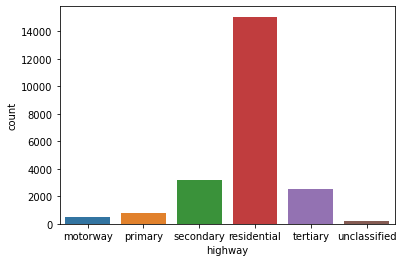

In [36]:
_ = sns.countplot(oakland_rds['highway'])

#### Roads map visualization

In [40]:
oakland_highways = oakland_rds[oakland_rds.highway == 'motorway']
oakland_primary = oakland_rds[oakland_rds.highway == 'primary']
oakland_secondary = oakland_rds[oakland_rds.highway == 'secondary']
oakland_tertiary = oakland_rds[oakland_rds.highway == 'tertiary']
oakland_resid = oakland_rds[oakland_rds.highway == 'residential']
oakland_highways.head(2)

osmid  oneway lanes   ref   highway maxspeed  \
u        v          key                                                     
30362888 1943438853 0    710721717    True     7  I 80  motorway   50 mph   
         30363957   0      4757566    True     1   NaN  motorway   50 mph   

                          length  \
u        v          key            
30362888 1943438853 0    135.576   
         30363957   0    352.533   

                                                                  geometry  \
u        v          key                                                      
30362888 1943438853 0    LINESTRING (-122.30305 37.82584, -122.30455 37...   
         30363957   0    LINESTRING (-122.30305 37.82584, -122.30463 37...   

                        bridge name tunnel access junction  
u        v          key                                     
30362888 1943438853 0      NaN  NaN    NaN    NaN      NaN  
         30363957   0      NaN  NaN    NaN    NaN      NaN

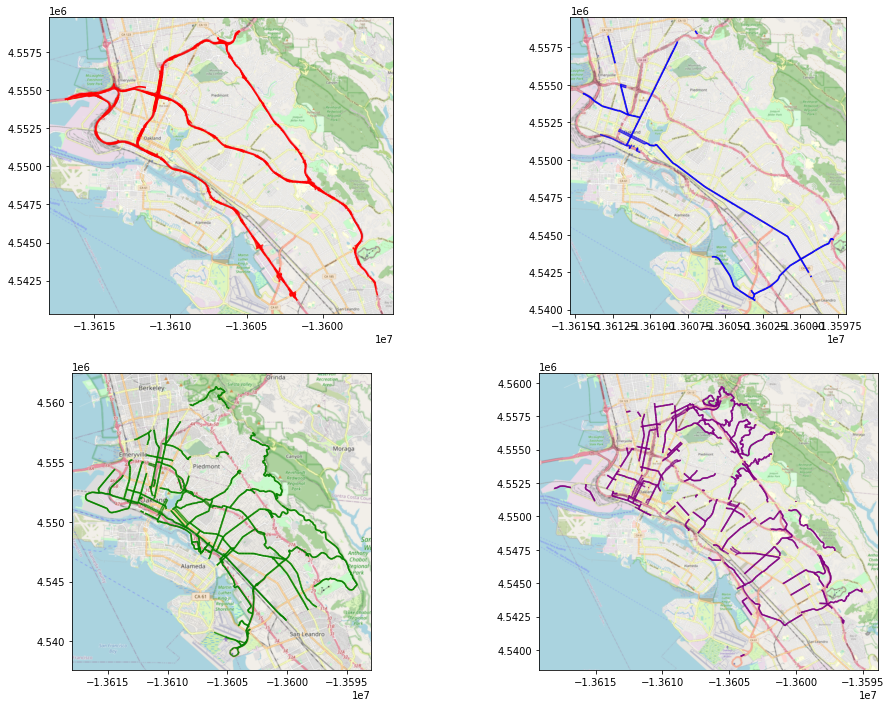

In [38]:
# Highway, pr
fig, ax = plt.subplots(2,2,figsize=(16, 12))
oakland_highways.to_crs(epsg=3857).plot(ax = ax[0][0],markersize=40,color="red",figsize=(8,4),
               edgecolor="white",alpha=0.8, marker="o")
ctx.add_basemap(ax[0][0], source=ctx.providers.OpenStreetMap.Mapnik)

oakland_primary.to_crs(epsg=3857).plot(ax = ax[0][1],markersize=40,color="blue",figsize=(8,4),
               edgecolor="white",alpha=0.8, marker="o")
ctx.add_basemap(ax[0][1], source=ctx.providers.OpenStreetMap.Mapnik)

oakland_secondary.to_crs(epsg=3857).plot(ax = ax[1][0],markersize=40,color="green",figsize=(8,4),
               edgecolor="white",alpha=0.8, marker="o")
ctx.add_basemap(ax[1][0], source=ctx.providers.OpenStreetMap.Mapnik)

oakland_tertiary.to_crs(epsg=3857).plot(ax = ax[1][1],markersize=40,color="purple",figsize=(8,4),
               edgecolor="white",alpha=0.8, marker="o")
ctx.add_basemap(ax[1][1], source=ctx.providers.OpenStreetMap.Mapnik)


#### Distance to road - construct more numerical features for model prediction

In [ ]:
# convert geometry from degree to meter
gpd_1_city_utm = gpd_1_city.to_crs({'init': 'epsg:32610'}).copy()      
highway_utm = oakland_highways.to_crs({'init': 'epsg:32610'}).copy()
primary_utm = oakland_primary.to_crs({'init': 'epsg:32610'}).copy()
secondary_utm = oakland_secondary.to_crs({'init': 'epsg:32610'}).copy()
tertiary_utm = oakland_tertiary.to_crs({'init': 'epsg:32610'}).copy()
residential_utm = oakland_resid.to_crs({'init': 'epsg:32610'}).copy()
def distance_to_roadway(gps, roadway):
    '''Calculate distance from GPS point to nearest road line polygon'''
    dists = []
    for i in roadway.geometry:
        dists.append(i.distance(gps))
    return(np.min(dists))

In [45]:
# Calculate the dsitance to cloest different types of road for each point ->  construct more featues
tqdm.pandas()
gpd_1_city['closest_highway'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = highway_utm)
gpd_1_city['closest_primary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = primary_utm)
gpd_1_city['closest_secondary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = secondary_utm)
gpd_1_city['closest_tertiary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = tertiary_utm)
gpd_1_city['closest_residential'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = residential_utm)

100%|██████████| 18219/18219 [23:30<00:00, 12.91it/s]


In [46]:
gpd_1_city.head(2)

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,...,lon,display_name,class,type,importance,closest_highway,closest_primary,closest_secondary,closest_tertiary,closest_residential
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,...,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796,1529.354679,2576.575272,3.000134e+01,0.003395,1406.342485
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,...,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796,1510.616902,2605.774822,5.010205e-08,63.387249,1385.119377


### Oakland city structures (stop sign and signals)

#### Stop sign and traffic signal inforamtion

In [53]:
nodes.head(2)

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
30362888,37.825844,-122.303049,8A,motorway_junction,3,POINT (-122.30305 37.82584)
30363957,37.825477,-122.307034,NaN,NaN,3,POINT (-122.30703 37.82548)


In [47]:
nodes['highway'].value_counts()

traffic_signals      778
stop                 341
turning_circle       321
motorway_junction    131
crossing               9
mini_roundabout        4
trailhead              3
Name: highway, dtype: int64

In [48]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
trafic_signals = nodes[nodes['highway'] == 'traffic_signals']
stop_cross = nodes[nodes['highway'] == 'stop']

#### Intersections map visulization

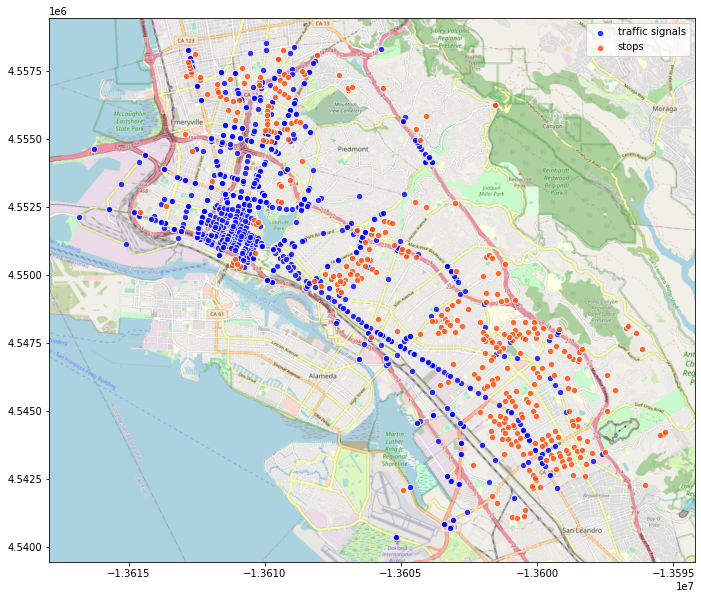

In [55]:
trafic_signals = nodes[nodes['highway'] == 'traffic_signals']
stop_cross = nodes[nodes['highway'] == 'stop']
fig, ax = plt.subplots(figsize=(12, 10))
trafic_signals.to_crs(epsg=3857).plot(ax = ax,figsize=(12,12),markersize=40,
                                      color="blue",edgecolor="white",alpha=0.8,marker="o",label = 'traffic signals')
stop_cross.to_crs(epsg=3857).plot(ax = ax, figsize=(12,12), markersize=40,
                                  color="orangered",edgecolor="white",alpha=0.8, marker="o",label ='stops')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.legend()

#### Distance to closest stop signs and traffic lights

In [51]:
traffic_sig_utm = trafic_signals.to_crs({'init': 'epsg:32610'}).copy() 
stop_sign_utm = stop_cross.to_crs({'init': 'epsg:32610'}).copy()      
def nearest_intersection(gps, intersections):
    ''' Calculates distance from GPS point to nearest intersection'''
    closest_point = nearest_points(gps, MultiPoint(intersections.values))[1]
    return(gps.distance(closest_point))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [52]:
tqdm.pandas()
gpd_1_city['trafic_signal_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = traffic_sig_utm['geometry'])
gpd_1_city['stop_sign_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = stop_sign_utm['geometry'])

100%|██████████| 18219/18219 [00:25<00:00, 701.80it/s]


In [56]:
gpd_1_city.head(2)

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,...,class,type,importance,closest_highway,closest_primary,closest_secondary,closest_tertiary,closest_residential,trafic_signal_dist,stop_sign_dist
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,...,boundary,administrative,0.851796,1529.354679,2576.575272,3.000134e+01,0.003395,1406.342485,30.001344,1818.142667
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,...,boundary,administrative,0.851796,1510.616902,2605.774822,5.010205e-08,63.387249,1385.119377,63.387249,1800.106387


### Categorical feature encoding

In [58]:
zone = gpd_1_city['zone']
road_type = gpd_1_city['road_type']
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['road_type'], drop_first=False)      # drop_first=False: do not remove a lable to reduce multicollision 
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['zone'], drop_first=False)
gpd_1_city = pd.concat([gpd_1_city, zone], axis = 1)
gpd_1_city = pd.concat([gpd_1_city, road_type], axis = 1)
pd.set_option('display.max_columns', None)
gpd_1_city.head(2)

,NO,NO2,PM2p5,geometry,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance,closest_highway,closest_primary,closest_secondary,closest_tertiary,closest_residential,trafic_signal_dist,stop_sign_dist,road_type_motorway,road_type_primary,road_type_residential,road_type_secondary,road_type_tertiary,road_type_unclassified,zone_commercial,zone_industrial,zone_mixed,zone_open_space,zone_residential,road_type_motorway,road_type_primary,road_type_residential,road_type_secondary,road_type_tertiary,road_type_unclassified,zone_commercial,zone_industrial,zone_mixed,zone_open_space,zone_residential,zone,road_type
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796,1529.354679,2576.575272,3.000134e+01,0.003395,1406.342485,30.001344,1818.142667,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,industrial,tertiary
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796,1510.616902,2605.774822,5.010205e-08,63.387249,1385.119377,63.387249,1800.106387,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,industrial,secondary


### Data preparation

In [62]:
gpd_1_city = gpd_1_city.drop([ 'Pt_CANCR'], axis=1) # drop irrelevant features
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('high'), '3', gpd_1_city['Respiratory_HI']) # Ordinal encoding respiratory column
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('moderate'), '2', gpd_1_city['Respiratory_HI']) 
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('low'), '1', gpd_1_city['Respiratory_HI'])
gpd_1_city["Respiratory_HI"] = gpd_1_city.Respiratory_HI.astype(float)
gpd_1_city.head(2)

,NO,NO2,PM2p5,geometry,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance,closest_highway,closest_primary,closest_secondary,closest_tertiary,closest_residential,trafic_signal_dist,stop_sign_dist,road_type_motorway,road_type_primary,road_type_residential,road_type_secondary,road_type_tertiary,road_type_unclassified,zone_commercial,zone_industrial,zone_mixed,zone_open_space,zone_residential,road_type_motorway,road_type_primary,road_type_residential,road_type_secondary,road_type_tertiary,road_type_unclassified,zone_commercial,zone_industrial,zone_mixed,zone_open_space,zone_residential,zone,road_type
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),8.336845,4.133333,14.950001,-122.322594,37.806781,3.0,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796,1529.354679,2576.575272,3.000134e+01,0.003395,1406.342485,30.001344,1818.142667,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,industrial,tertiary
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),8.336845,4.133333,14.950001,-122.322310,37.806150,3.0,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796,1510.616902,2605.774822,5.010205e-08,63.387249,1385.119377,63.387249,1800.106387,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,industrial,secondary


In [70]:
gpd_1_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18219 entries, 0 to 18218
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NO                      18219 non-null  float64 
 1   NO2                     18219 non-null  float64 
 2   PM2p5                   18219 non-null  float64 
 3   geometry                18219 non-null  geometry
 4   pop_den                 18219 non-null  float64 
 5   wind                    18219 non-null  float64 
 6   temp                    18219 non-null  float64 
 7   Longitude               18219 non-null  float64 
 8   Latitude                18219 non-null  float64 
 9   Respiratory_HI          18219 non-null  float64 
 10  place_id                18219 non-null  int64   
 11  osm_type                18219 non-null  object  
 12  osm_id                  18219 non-null  int64   
 13  lat                     18219 non-null  float64 
 14  lon           

In [76]:
categorical = gpd_1_city.columns[gpd_1_city.dtypes == 'object']
numerical = gpd_1_city.columns[gpd_1_city.dtypes == 'float']
categorical,numerical

(Index(['osm_type', 'display_name', 'class', 'type', 'zone', 'road_type'], dtype='object'),
 Index(['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp', 'Longitude',
        'Latitude', 'Respiratory_HI', 'lat', 'lon', 'importance',
        'closest_highway', 'closest_primary', 'closest_secondary',
        'closest_tertiary', 'closest_residential', 'trafic_signal_dist',
        'stop_sign_dist'],
       dtype='object'))

In [78]:
categorical = ['geometry','zone', 'road_type']
numerical = ['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp',  'Respiratory_HI', 
        'closest_highway', 'closest_primary', 'closest_secondary',
        'closest_tertiary', 'closest_residential', 'trafic_signal_dist',
        'stop_sign_dist']

## Data Visualization

### Correlation analysis

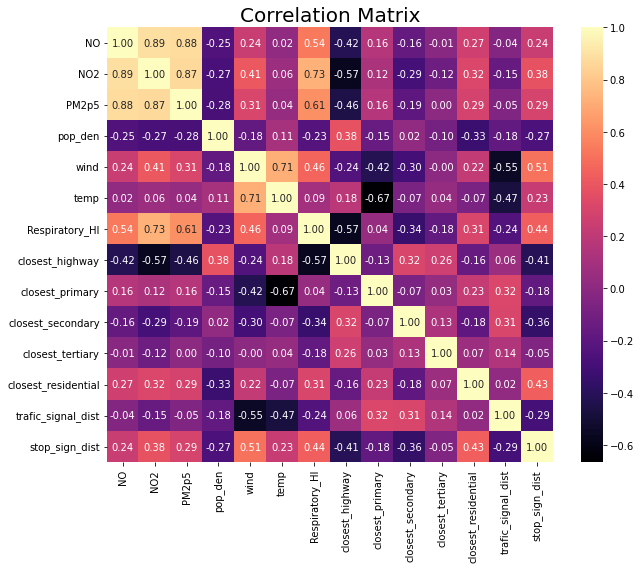

In [80]:
# except polutions, there is no strong correlation observed from the heatmap
f, ax = plt.subplots(figsize= [10,8]) 
sns.heatmap(gpd_1_city[numerical].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

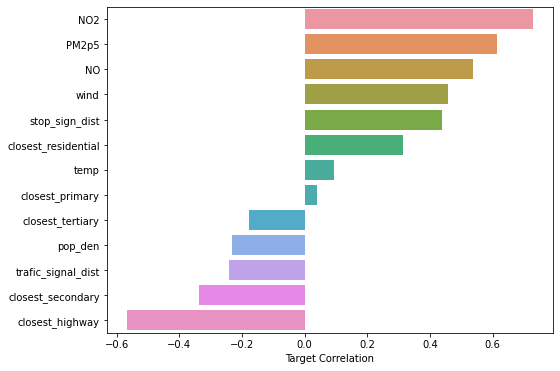

In [84]:
# No2,PM2.5,No have strong positive correlation with Respiratory Health feature.
# it means that these three features can increase the possibility of having respiratory diseases
Corr = pd.DataFrame(gpd_1_city[numerical].corr()['Respiratory_HI'].sort_values(ascending=False)) 
Corr = Corr.iloc[1:,:]
Corr.columns=['Target Correlation']
g0 = sns.barplot(x="Target Correlation", y=Corr.index, data=Corr)
g0.figure.set_size_inches(8, 6)

### Map visulization

Text(0.5, 1.0, 'NO Distribution')

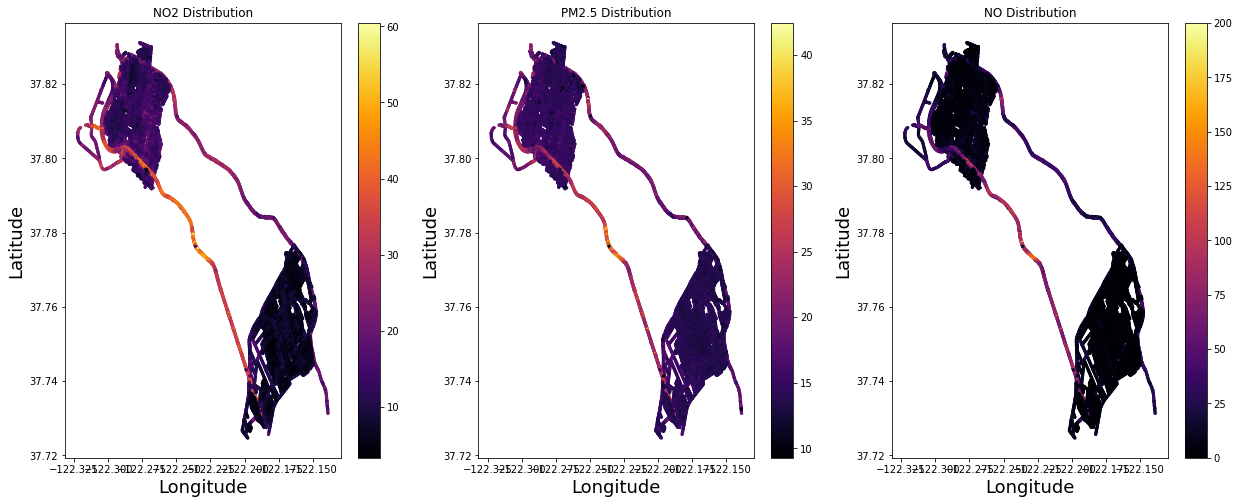

In [111]:
# higher harful gas content along highways and primary roads
plt.figure(figsize=(21,8))
plt.subplot(1,3,1)
plt.scatter(x= gpd_1_city.Longitude, y =gpd_1_city.Latitude, s=5, c = gpd_1_city.NO2,cmap='inferno')
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)
plt.title('NO2 Distribution')
plt.subplot(1,3,2)
plt.scatter(gpd_1_city.Longitude, gpd_1_city.Latitude, s=5, c = gpd_1_city.PM2p5, cmap='inferno')
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)
plt.title('PM2.5 Distribution')
plt.subplot(1,3,3)
plt.scatter(gpd_1_city.Longitude, gpd_1_city.Latitude, s=5, c = gpd_1_city.NO, cmap='inferno')
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)
plt.title('NO Distribution')

### Data exploration

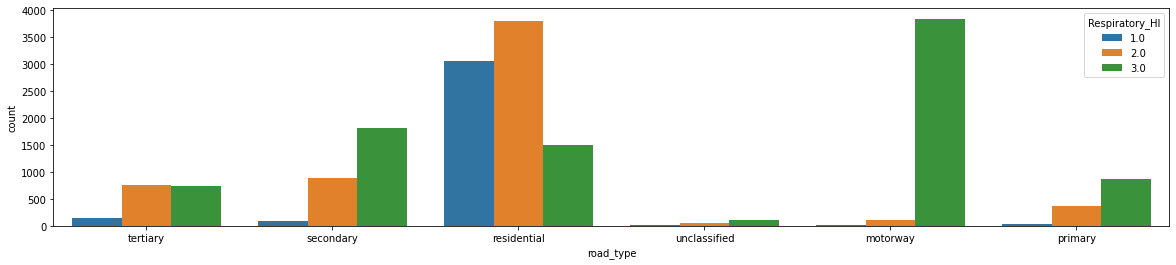

In [113]:
plt.figure(figsize=(20,4)) # There are a lot more respiratory disease cases along highway and primary road. The busier the road, more cases.
sns.countplot(x = 'road_type', hue = gpd_1_city['Respiratory_HI'], data = gpd_1_city);

In [119]:
gpd_1_city['road_type'].unique()

array(['tertiary', 'secondary', 'residential', 'unclassified', 'motorway',
       'primary'], dtype=object)

#### roadtype boxplots

Text(0.5, 1.0, 'PM2p5')

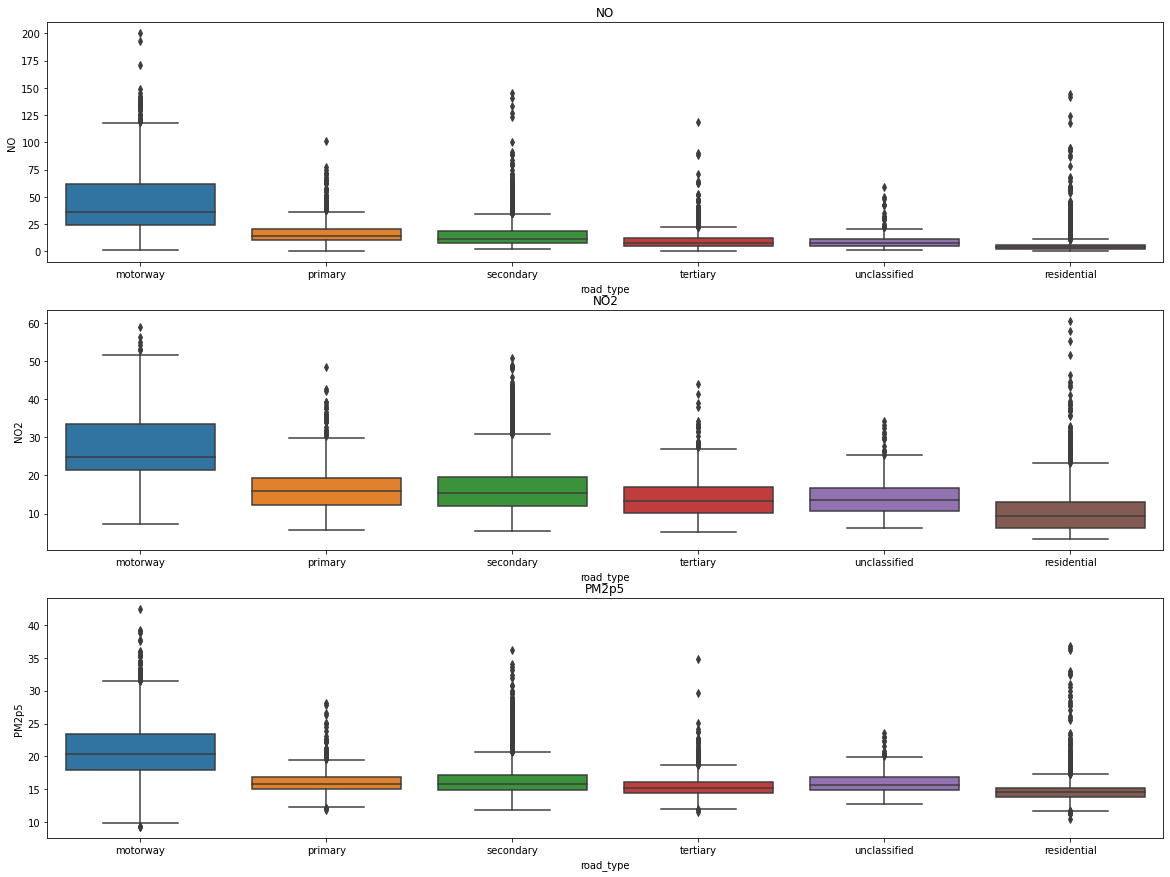

In [122]:
# Same conclusion drawed from map visulization
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x = gpd_1_city['road_type'], y = gpd_1_city['NO'],order=[ 'motorway','primary', 'secondary','tertiary','unclassified', 'residential'])
plt.title('NO')
plt.subplot(3,1,2)
sns.boxplot(x = gpd_1_city['road_type'], y = gpd_1_city['NO2'],order=[ 'motorway','primary', 'secondary','tertiary','unclassified', 'residential'])
plt.title('NO2')
plt.subplot(3,1,3)
sns.boxplot(x = gpd_1_city['road_type'], y = gpd_1_city['PM2p5'],order=[ 'motorway','primary', 'secondary','tertiary','unclassified', 'residential'])
plt.title('PM2p5')

#### Zone boxplots

Text(0.5, 1.0, 'PM2p5')

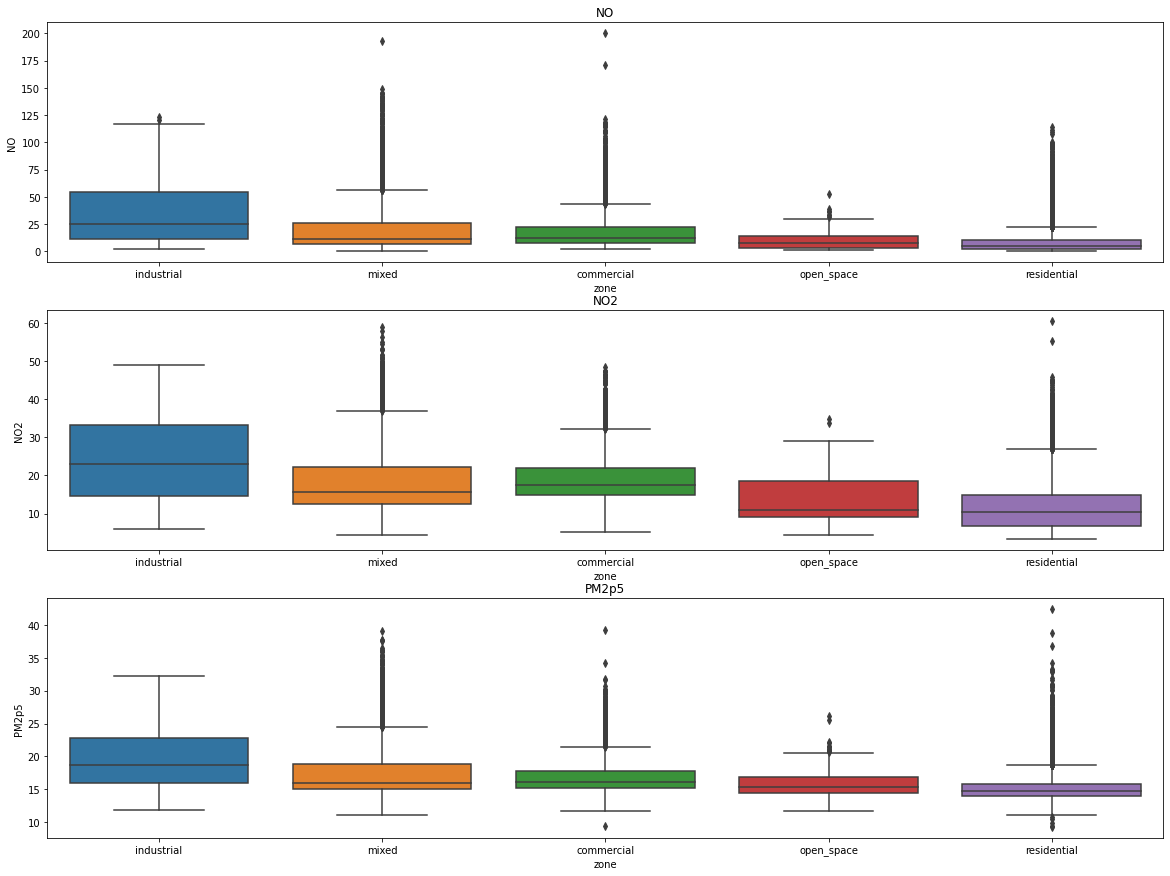

In [125]:
# industry has the highest polution content. buying house should avoid industry and mix areas
orders = ['industrial', 'mixed',  'commercial', 'open_space','residential']
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x = gpd_1_city['zone'], y = gpd_1_city['NO'],order=orders)
plt.title('NO')
plt.subplot(3,1,2)
sns.boxplot(x = gpd_1_city['zone'], y = gpd_1_city['NO2'],order=orders)
plt.title('NO2')
plt.subplot(3,1,3)
sns.boxplot(x = gpd_1_city['zone'], y = gpd_1_city['PM2p5'],order=orders)
plt.title('PM2p5')

#### distance influence

Text(0.5, 1.0, 'NO')

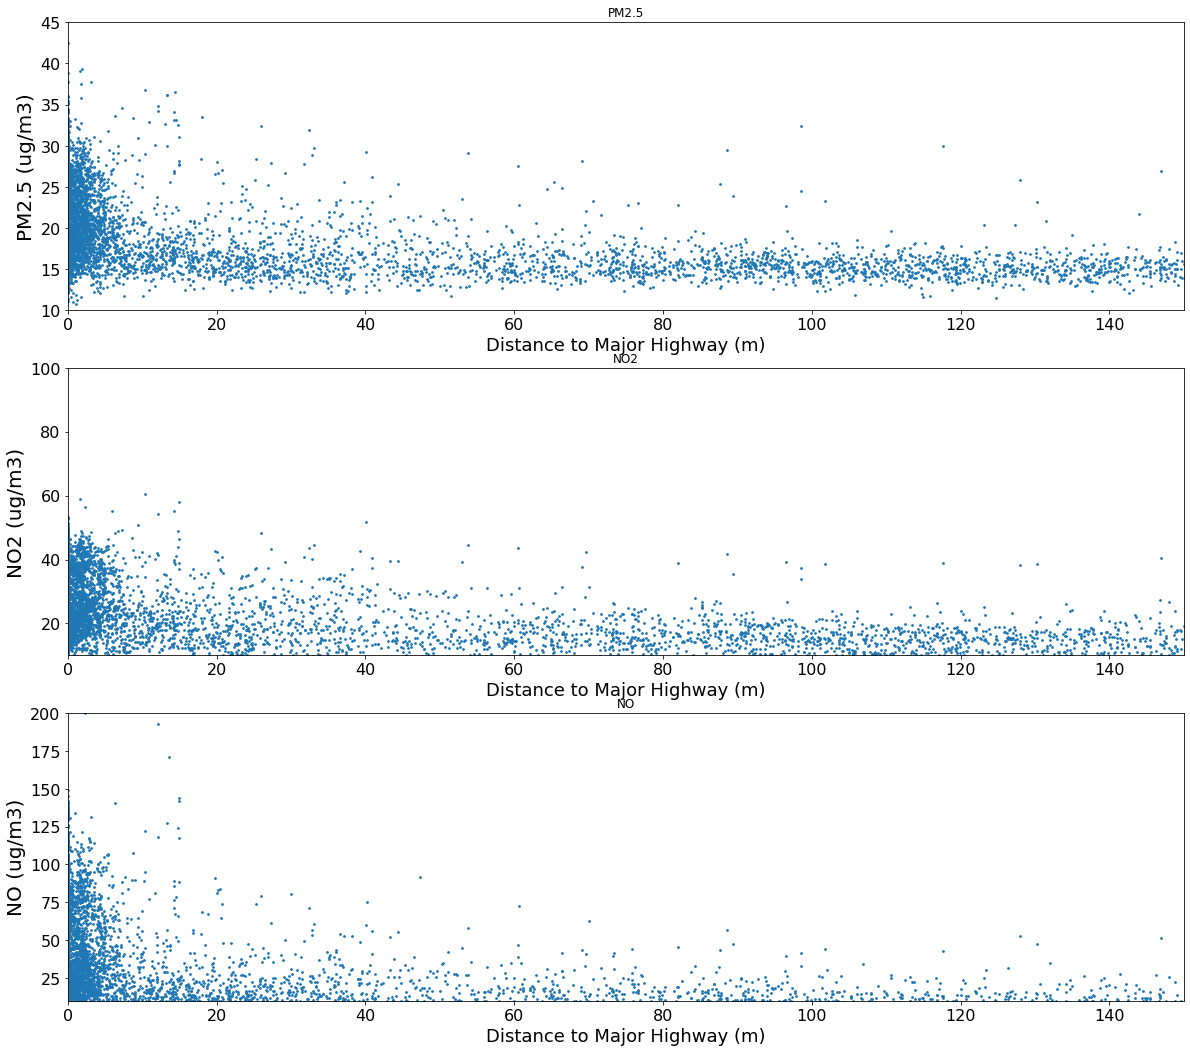

In [144]:
# hosue should be at least 40m away from major roads
plt.figure(figsize=(20, 18))
plt.subplot(3,1,1)
plt.scatter(gpd_1_city['closest_highway'], gpd_1_city['PM2p5'], s=3)
plt.ylim(10, 45)
plt.xlim(0,150)
plt.tick_params(labelsize=16)
plt.xlabel('Distance to Major Highway (m)', fontsize=18); plt.ylabel('PM2.5 (ug/m3)', fontsize=20)
plt.title('PM2.5')
plt.subplot(3,1,2)
plt.scatter(gpd_1_city['closest_highway'], gpd_1_city['NO2'], s=3)
plt.ylim(10, 100)
plt.xlim(0,150)
plt.tick_params(labelsize=16)
plt.xlabel('Distance to Major Highway (m)', fontsize=18); plt.ylabel('NO2 (ug/m3)', fontsize=20)
plt.title('NO2')
plt.subplot(3,1,3)
plt.scatter(gpd_1_city['closest_highway'], gpd_1_city['NO'], s=3)
plt.ylim(10, 200)
plt.xlim(0,150)
plt.tick_params(labelsize=16)
plt.xlabel('Distance to Major Highway (m)', fontsize=18); plt.ylabel('NO (ug/m3)', fontsize=20)
plt.title('NO')

## Model 

In [147]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')

    
def pred_summary(pred, ytest, limit = 200):
    sns.scatterplot(pred, ytest)
    abline(1, 0) #1-1 line
    plt.ylim(0, limit); plt.xlim(0, limit)
    plt.tick_params(labelsize=18)
    
    print('RMSE', np.sqrt(mean_squared_error(ytest, pred)))
    print('R2', r2_score(ytest, pred))
    
    
    
def plot_corr(df, size=10, MI = False):
    if MI == False:
        corr = df.corr()
    else:
        K = df.shape[1]
        corr = np.empty((K, K), dtype=float)
        
        for i, ac in enumerate(X.columns):
            for j, bc in enumerate(X.columns):
                MI = mutual_information(X.loc[:, ac], X.loc[:, bc], bins=10, normalize=True)
                corr[i, j] = MI
        
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [149]:
###

### Feature selection

In [155]:
X = gpd_1_city[numerical].drop(['Respiratory_HI', 'NO', 'NO2', 'PM2p5'], axis=1)
X.head()

,pop_den,wind,temp,closest_highway,closest_primary,closest_secondary,closest_tertiary,closest_residential,trafic_signal_dist,stop_sign_dist
0,8.336845,4.133333,14.950001,1529.354679,2576.575272,3.000134e+01,0.003395,1406.342485,30.001344,1818.142667
1,8.336845,4.133333,14.950001,1510.616902,2605.774822,5.010205e-08,63.387249,1385.119377,63.387249,1800.106387
2,8.336845,4.133333,14.950001,1506.806733,2584.619548,2.889834e-01,33.436991,1382.271689,33.436991,1796.026464
3,8.336845,4.133333,14.950001,1513.209482,2625.798375,2.675342e-03,93.269052,1386.820750,93.269052,1802.893651
4,8.336845,4.133333,14.950001,1501.369611,2562.159240,3.989883e-02,3.463454,1377.920449,3.463454,1790.303496


### Train-Test split & feature scaling

In [157]:
# NO 
y_NO = gpd_1_city['NO']

# NO Split the Data
X_train_NO, X_test_NO, y_train_NO, y_test_NO = model_selection.train_test_split(X, y_NO, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO.shape[0]) + ' observation with ' + str(X_train_NO.shape[1]) + ' features')
print('test data has ' + str(X_test_NO.shape[0]) + ' observation with ' + str(X_test_NO.shape[1]) + ' features')

# Feature Scaling 
scaler = StandardScaler()                               
scaler.fit(X_train_NO)                                  
X_train_NO = scaler.transform(X_train_NO)               
X_test_NO = scaler.transform(X_test_NO)                 

training data has 13664 observation with 10 features
test data has 4555 observation with 10 features


In [158]:
# NO2 
y_NO2 = gpd_1_city['NO2']

# NO2 Split the Data
X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = model_selection.train_test_split(X, y_NO2, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO2.shape[0]) + ' observation with ' + str(X_train_NO2.shape[1]) + ' features')
print('test data has ' + str(X_test_NO2.shape[0]) + ' observation with ' + str(X_test_NO2.shape[1]) + ' features')

# Feature Scaling 
scaler = StandardScaler()                               
scaler.fit(X_train_NO2)                                  
X_train_NO2 = scaler.transform(X_train_NO2)               
X_test_NO2 = scaler.transform(X_test_NO2)    

training data has 13664 observation with 10 features
test data has 4555 observation with 10 features


In [159]:
# PM 
y_PM = gpd_1_city['PM2p5']

# PM Split the Data
X_train_PM, X_test_PM, y_train_PM, y_test_PM = model_selection.train_test_split(X, y_PM, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_PM.shape[0]) + ' observation with ' + str(X_train_PM.shape[1]) + ' features')
print('test data has ' + str(X_test_PM.shape[0]) + ' observation with ' + str(X_test_PM.shape[1]) + ' features')

# Feature Scaling 
scaler = StandardScaler()                               
scaler.fit(X_train_PM)                                  
X_train_PM = scaler.transform(X_train_PM)               
X_test_PM = scaler.transform(X_test_PM) 

training data has 13664 observation with 10 features
test data has 4555 observation with 10 features


### Model Training 

#### NO2 model training

##### Random Forest

RMSE 2.124502223679426
R2 0.9443904877615944


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed NO$_2$')

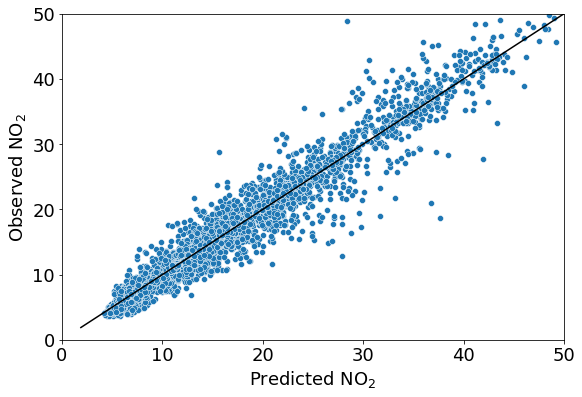

In [160]:
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid_no2 = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_no2.fit(X_train_NO2, y_train_NO2)

print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_no2.best_score_)))
print(forest_grid_no2.best_estimator_)

fig = plt.figure(figsize=(9,6))
forest_out_no2 = forest_grid_no2.predict(X_test_NO2)
pred_summary(forest_out_no2, y_test_NO2, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [170]:
FI_rf = pd.DataFrame(forest_grid_no2.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)

,Feature Importance (RF)
closest_highway,0.420538
wind,0.147141
closest_residential,0.131352
temp,0.070703
pop_den,0.048683
closest_primary,0.044207
stop_sign_dist,0.039222
closest_tertiary,0.036552
closest_secondary,0.034612
trafic_signal_dist,0.026990


In [176]:
grid_search_best_no2 = forest_grid_no2.best_estimator_
PI_no2 = permutation_importance(grid_search_best_no2, X_test_NO2, y_test_NO2, n_repeats=5, random_state=1)
PI_res = pd.DataFrame(data=np.transpose([PI_no2['importances_mean'],PI_no2['importances_std']]), 
             index = X.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)

##### Gradient Boosting

Best score (RMSE) 2.9643561238296647
GradientBoostingRegressor(learning_rate=0.5, max_features=8, n_estimators=200)
RMSE 2.9203686205466544
R2 0.8949224223633852


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed NO$_2$')

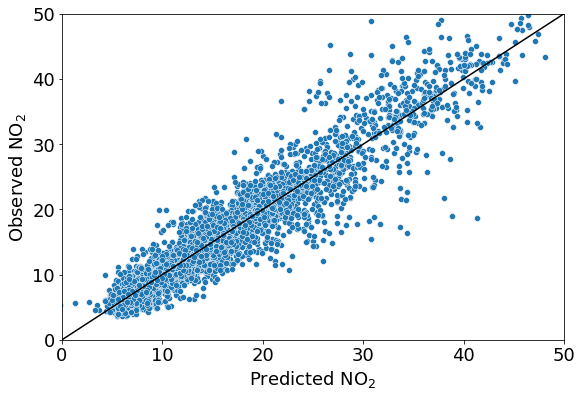

In [161]:
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_no2 = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_no2.fit(X_train_NO2, y_train_NO2)

print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_no2.best_score_)))
print(gb_forest_grid_no2.best_estimator_)

fig = plt.figure(figsize=(9,6))
gb_forest_out_no2 = gb_forest_grid_no2.predict(X_test_NO2)
pred_summary(gb_forest_out_no2, y_test_NO2, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [173]:
FI_gb = pd.DataFrame(gb_forest_grid_no2.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)


##### Top Feature Summary

In [182]:
summary_0 = pd.DataFrame({'Random Forest':list(FI_rf.index), 
                          'Gradient Boost':list(FI_gb.index),
                           'Permutation Importance':list(PI_res.index),
                          })
summary_0

,Random Forest,Gradient Boost,Permutation Importance
0,closest_highway,closest_highway,closest_highway
1,wind,closest_residential,wind
2,closest_residential,wind,temp
3,temp,temp,closest_primary
4,pop_den,pop_den,closest_residential
5,closest_primary,trafic_signal_dist,pop_den
6,stop_sign_dist,closest_primary,closest_secondary
7,closest_tertiary,closest_tertiary,stop_sign_dist
8,closest_secondary,closest_secondary,closest_tertiary
9,trafic_signal_dist,stop_sign_dist,trafic_signal_dist


##### Conclusion
* RF model has better performance, RMSE is 2.12 and R-square is 0.94
* Top 5 features are same from different models and feature importance methods although their ranking is slightly different


#### NO model training

##### Random Forest

Best score (RMSE) 6.379194555099795
RandomForestRegressor(max_features=6, n_estimators=150, n_jobs=2)
RMSE 5.856448109825389
R2 0.9193738306983709


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed NO$_2$')

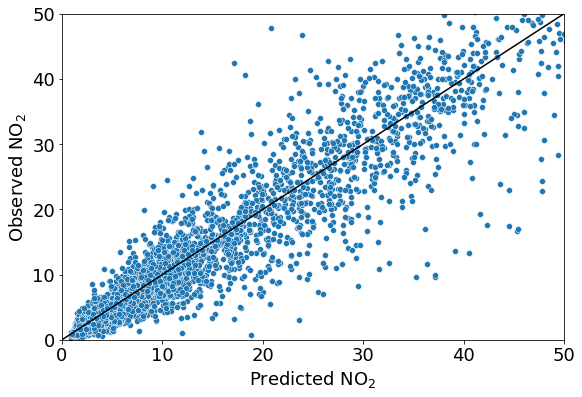

In [183]:
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid_NO = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_NO.fit(X_train_NO, y_train_NO)

print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_NO.best_score_)))
print(forest_grid_NO.best_estimator_)

fig = plt.figure(figsize=(9,6))
forest_out_NO = forest_grid_NO.predict(X_test_NO)
pred_summary(forest_out_NO, y_test_NO, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [184]:
FI_rf = pd.DataFrame(forest_grid_NO.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)

In [185]:
# Permutation importance analysis
grid_search_best_NO = forest_grid_NO.best_estimator_
PI_NO = permutation_importance(grid_search_best_NO, X_test_NO, y_test_NO, n_repeats=5, random_state=1)
PI_res = pd.DataFrame(data=np.transpose([PI_NO['importances_mean'],PI_NO['importances_std']]), 
             index = X.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)

##### Gradient Boosting

Best score (RMSE) 8.154132146826015
GradientBoostingRegressor(learning_rate=0.5, max_features=8, n_estimators=200)
RMSE 7.716910154511166
R2 0.8600108699249129


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed NO$_2$')

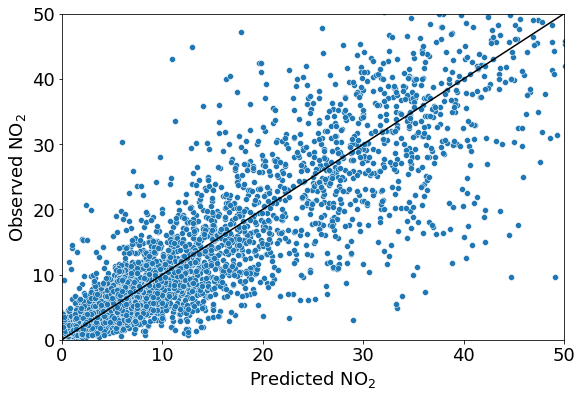

In [186]:
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_NO = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_NO.fit(X_train_NO, y_train_NO)

print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_NO.best_score_)))
print(gb_forest_grid_NO.best_estimator_)

fig = plt.figure(figsize=(9,6))
gb_forest_out_NO = gb_forest_grid_NO.predict(X_test_NO)
pred_summary(gb_forest_out_NO, y_test_NO, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [187]:
FI_gb = pd.DataFrame(gb_forest_grid_NO.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)


##### Top Feature Summary

In [188]:
summary_0 = pd.DataFrame({'Random Forest':list(FI_rf.index), 
                          'Gradient Boost':list(FI_gb.index),
                           'Permutation Importance':list(PI_res.index),
                          })
summary_0

,Random Forest,Gradient Boost,Permutation Importance
0,closest_highway,closest_highway,closest_highway
1,closest_residential,temp,temp
2,temp,wind,wind
3,wind,closest_residential,closest_residential
4,pop_den,closest_primary,closest_primary
5,closest_primary,pop_den,pop_den
6,closest_secondary,closest_tertiary,closest_secondary
7,closest_tertiary,closest_secondary,closest_tertiary
8,trafic_signal_dist,stop_sign_dist,stop_sign_dist
9,stop_sign_dist,trafic_signal_dist,trafic_signal_dist


#### PM2.5 model training

##### Random Forest

Best score (RMSE) 1.4161903876946917
RandomForestRegressor(max_features=8, n_estimators=200, n_jobs=2)
RMSE 1.316767615070798
R2 0.852960134270975


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed PM$_2$')

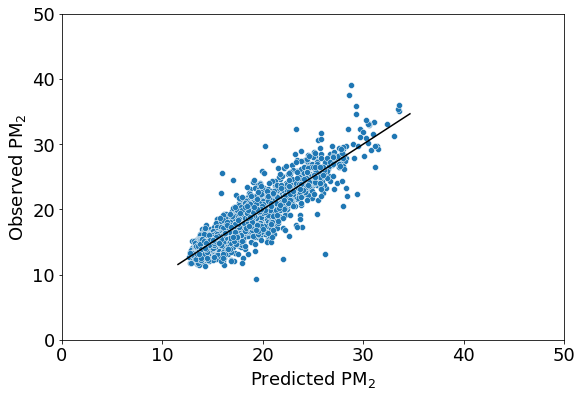

In [189]:
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid_PM = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_PM.fit(X_train_PM, y_train_PM)

print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_PM.best_score_)))
print(forest_grid_PM.best_estimator_)

fig = plt.figure(figsize=(9,6))
forest_out_PM = forest_grid_PM.predict(X_test_PM)
pred_summary(forest_out_PM, y_test_PM, limit=50)
plt.xlabel('Predicted PM$_2$', fontsize = 18); plt.ylabel('Observed PM$_2$', fontsize=18)

In [190]:
FI_rf = pd.DataFrame(forest_grid_PM.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)

In [191]:
# Permutation importance analysis
grid_search_best_PM = forest_grid_PM.best_estimator_
PI_PM = permutation_importance(grid_search_best_PM, X_test_PM, y_test_PM, n_repeats=5, random_state=1)
PI_res = pd.DataFrame(data=np.transpose([PI_PM['importances_mean'],PI_PM['importances_std']]), 
             index = X.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)

##### Gradient Boosting

Best score (RMSE) 1.6311600533877944
GradientBoostingRegressor(learning_rate=0.5, max_features=10, n_estimators=200)
RMSE 1.5426378099316733
R2 0.7981890312569613


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed PM$_2$')

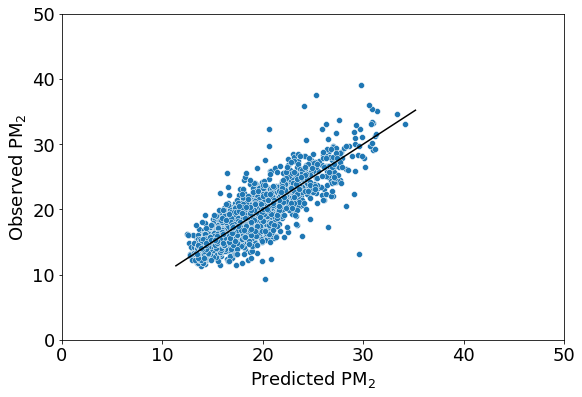

In [192]:
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_PM = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_PM.fit(X_train_PM, y_train_PM)

print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_PM.best_score_)))
print(gb_forest_grid_PM.best_estimator_)

fig = plt.figure(figsize=(9,6))
gb_forest_out_PM = gb_forest_grid_PM.predict(X_test_PM)
pred_summary(gb_forest_out_PM, y_test_PM, limit=50)
plt.xlabel('Predicted PM$_2$', fontsize = 18); plt.ylabel('Observed PM$_2$', fontsize=18)

In [193]:
FI_gb = pd.DataFrame(gb_forest_grid_PM.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)


##### Top Feature Summary

In [194]:
summary_0 = pd.DataFrame({'Random Forest':list(FI_rf.index), 
                          'Gradient Boost':list(FI_gb.index),
                           'Permutation Importance':list(PI_res.index),
                          })
summary_0

,Random Forest,Gradient Boost,Permutation Importance
0,closest_highway,closest_highway,closest_highway
1,wind,temp,wind
2,closest_residential,wind,closest_primary
3,temp,pop_den,temp
4,closest_primary,closest_primary,pop_den
5,pop_den,closest_tertiary,closest_residential
6,closest_secondary,closest_secondary,closest_secondary
7,closest_tertiary,closest_residential,trafic_signal_dist
8,trafic_signal_dist,stop_sign_dist,closest_tertiary
9,stop_sign_dist,trafic_signal_dist,stop_sign_dist


## Conclusion
* Respiratory Risk is strong correlated with NO, NO2, PM2.5
* The content of NO, NO2, and PM2.5 are much higher along busy roads, such as highway, primary road, and so on
* The content of NO, NO2, and PM2.5 is high in industry area and mixed area.
* The polution content droped and remain stable when the home is 40 m away from the busy raods.
* The polution content can be predicted by Random Froest models that have the best performance. RF models have smaller RMSE and higher R-sqaure.
* The top 5 features that influence polution content are 'closest_highway', 'wind', cloest_primary, temp, and wind.

## Recommendation
* Buying home should avoid industry and mixed area
* Buying home should at least 40 meters away from higway and primary road
* Buying home at the upwardupwind area
* Further research should be done to determine accurate safety distance